Loading dataset...
Found 7650 files belonging to 12 classes.
Using 6120 files for training.
Found 7650 files belonging to 12 classes.
Using 1530 files for validation.
Found 12 classes: ['apple_Alternaria leaf spot', 'apple_Brown spot', 'apple_Gray spot', 'apple_Healthy leaf', 'apple_Rust', 'tomato_Tomato___Bacterial_spot', 'tomato_Tomato___Early_blight', 'tomato_Tomato___Late_blight', 'tomato_Tomato___Leaf_Mold', 'tomato_Tomato___Septoria_leaf_spot', 'tomato_Tomato___Spider_mites Two-spotted_spider_mite', 'tomato_Tomato___Target_Spot']
Model compiled successfully!


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │          15,372 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273,356 (8.67 MB)

 Trainable params: 15,372 (60.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None
Starting training...
Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.4808 - loss: 1.5410 - val_accuracy: 0.7523 - val_loss: 0.7380 - learning_rate: 0.0010
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7760 - loss: 0.6503 - val_accuracy: 0.8020 - val_loss: 0.6000 - learning_rate: 0.0010
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.8088 - loss: 0.5486 - val_accuracy: 0.8131 - val_loss: 0.5679 - learning_rate: 0.0010
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8352 - loss: 0.4769 - val_accuracy: 0.8288 - val_loss: 0.5236 - learning_rate: 0.0010
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.8502 - loss: 0.4373 - val_accuracy: 0.8458 - val_loss: 0.4847 - learning_rate: 0.0010
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.8579 - loss: 0.4227 - val_accuracy: 0.8503 - val_loss: 0.4708 - learning_rate: 0.0010
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - a

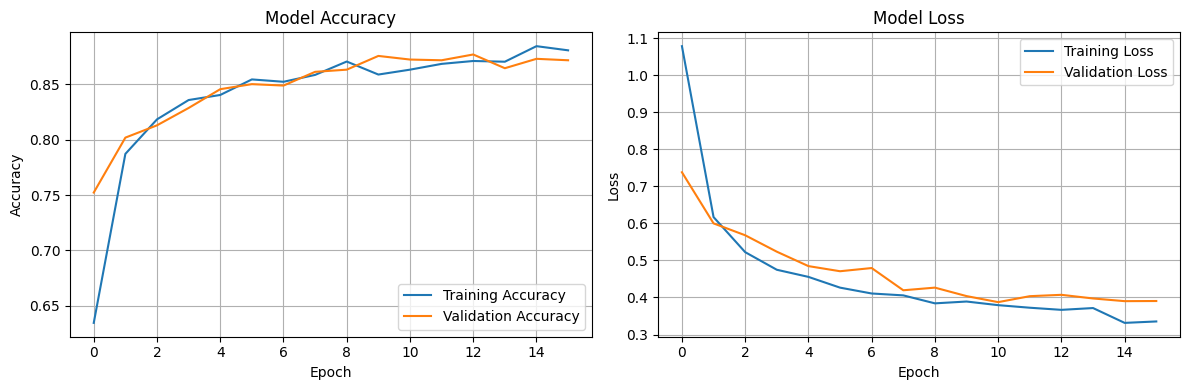


Classification Report:
Error: Number of classes, 11, does not match size of target_names, 12. Try specifying the labels parameter
Make sure your dataset directory contains the proper nested structure:
my_diseases_dataset/plant_type/disease_condition/


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

class PlantDiseaseClassifier:
    def __init__(self, data_dir, img_size=(224, 224), batch_size=32):
        self.data_dir = data_dir
        self.img_size = img_size
        self.batch_size = batch_size
        self.model = None
        self.history = None
        self.class_names = None
        self.medicine_dict = {
            "apple_healthy": "No treatment needed",
            "apple_scab": "Fungicide: Captan or Mancozeb",
            "apple_powdery_mildew": "Fungicide: Sulfur spray or Potassium bicarbonate",
            "tomato_healthy": "No treatment needed",
            "tomato_early_blight": "Fungicide: Chlorothalonil or Copper-based spray",
            "tomato_late_blight": "Fungicide: Fluazinam or Metalaxyl",
        }

    def load_data(self, validation_split=0.2):
        """Load and prepare the dataset from nested directory structure"""
        if not os.path.exists(self.data_dir):
            raise FileNotFoundError(f"Dataset directory '{self.data_dir}' not found. Please ensure the dataset is available.")
        
        print("Loading dataset...")
        
        # Create a flattened structure for keras to understand
        flat_data_dir = self._create_flat_structure()
        
        self.train_ds = tf.keras.utils.image_dataset_from_directory(
            flat_data_dir,
            validation_split=validation_split,
            subset="training",
            seed=42,
            image_size=self.img_size,
            batch_size=self.batch_size
        )
        self.val_ds = tf.keras.utils.image_dataset_from_directory(
            flat_data_dir,
            validation_split=validation_split,
            subset="validation",
            seed=42,
            image_size=self.img_size,
            batch_size=self.batch_size
        )
        self.class_names = self.train_ds.class_names
        print(f"Found {len(self.class_names)} classes: {self.class_names}")
        
        # Optimize dataset performance
        AUTOTUNE = tf.data.AUTOTUNE
        self.train_ds = self.train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
        self.val_ds = self.val_ds.cache().prefetch(buffer_size=AUTOTUNE)
        return self.train_ds, self.val_ds
    
    def _create_flat_structure(self):
        """Create symbolic links to flatten the nested structure for keras"""
        import shutil
        
        flat_dir = "temp_flat_dataset"
        if os.path.exists(flat_dir):
            shutil.rmtree(flat_dir)
        os.makedirs(flat_dir)
        
        # Walk through the nested structure
        for plant_type in os.listdir(self.data_dir):
            plant_path = os.path.join(self.data_dir, plant_type)
            if os.path.isdir(plant_path):
                for disease in os.listdir(plant_path):
                    disease_path = os.path.join(plant_path, disease)
                    if os.path.isdir(disease_path):
                        # Create flattened class name
                        flat_class_name = f"{plant_type}_{disease}"
                        flat_class_path = os.path.join(flat_dir, flat_class_name)
                        
                        # Copy the directory
                        shutil.copytree(disease_path, flat_class_path)
        
        return flat_dir

    def create_data_augmentation(self):
        """Create data augmentation layers"""
        return keras.Sequential([
            layers.RandomFlip("horizontal_and_vertical"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2),
            layers.RandomBrightness(0.2),
        ])

    def create_model(self, num_classes, use_transfer_learning=True):
        """Create the model architecture"""
        if use_transfer_learning:
            # Transfer learning with MobileNetV2
            base_model = tf.keras.applications.MobileNetV2(
                input_shape=(*self.img_size, 3),
                include_top=False,
                weights='imagenet'
            )
            base_model.trainable = False
            
            data_augmentation = self.create_data_augmentation()
            preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
            
            inputs = keras.Input(shape=(*self.img_size, 3))
            x = data_augmentation(inputs)
            x = preprocess_input(x)
            x = base_model(x, training=False)
            x = layers.GlobalAveragePooling2D()(x)
            x = layers.Dropout(0.2)(x)
            outputs = layers.Dense(num_classes, activation='softmax')(x)
            model = keras.Model(inputs, outputs)
        else:
            # Custom CNN architecture
            data_augmentation = self.create_data_augmentation()
            model = keras.Sequential([
                data_augmentation,
                layers.Rescaling(1./255),
                layers.Conv2D(32, 3, padding='same', activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D(),
                layers.Conv2D(64, 3, padding='same', activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D(),
                layers.Conv2D(128, 3, padding='same', activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D(),
                layers.Conv2D(256, 3, padding='same', activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D(),
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dropout(0.5),
                layers.Dense(256, activation='relu'),
                layers.Dropout(0.3),
                layers.Dense(num_classes, activation='softmax')
            ])
        
        self.model = model
        return model

    def compile_model(self, learning_rate=0.001):
        """Compile the model"""
        self.model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        print("Model compiled successfully!")
        print(self.model.summary())

    def train_model(self, epochs=20, callbacks=None):
        """Train the model"""
        if callbacks is None:
            callbacks = [
                keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
            ]
        
        print("Starting training...")
        self.history = self.model.fit(
            self.train_ds,
            validation_data=self.val_ds,
            epochs=epochs,
            callbacks=callbacks,
            verbose=1
        )
        return self.history

    def fine_tune_model(self, fine_tune_epochs=10, fine_tune_at=100):
        """Fine-tune the pre-trained model"""
        if len(self.model.layers) > 3:
            base_model = self.model.layers[3]  # Assuming transfer learning model structure
            base_model.trainable = True
            
            # Fine-tune from this layer onwards
            for layer in base_model.layers[:fine_tune_at]:
                layer.trainable = False
            
            # Recompile with lower learning rate
            self.model.compile(
                optimizer=keras.optimizers.Adam(1e-6),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
            
            print(f"Fine-tuning model from layer {fine_tune_at}...")
            fine_tune_history = self.model.fit(
                self.train_ds,
                validation_data=self.val_ds,
                epochs=fine_tune_epochs,
                initial_epoch=len(self.history.history['loss']),
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
            )
            
            # Extend history
            for key in self.history.history.keys():
                self.history.history[key].extend(fine_tune_history.history[key])
            
            return fine_tune_history
        else:
            print("Fine-tuning not available for this model architecture")
            return None

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available. Train the model first.")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Plot accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)
        
        # Plot loss
        ax2.plot(self.history.history['loss'], label='Training Loss')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

    def evaluate_model(self):
        """Evaluate the model and show detailed metrics"""
        y_pred, y_true = [], []
        for images, labels in self.val_ds:
            predictions = self.model.predict(images, verbose=0)
            y_pred.extend(np.argmax(predictions, axis=1))
            y_true.extend(labels.numpy())
        
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))
        
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        accuracy = np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
        print(f"\nOverall Validation Accuracy: {accuracy:.4f}")
        return accuracy

    def save_model(self, filepath):
        """Save the trained model"""
        self.model.save(filepath)
        print(f"Model saved to {filepath}")

    def load_model(self, filepath):
        """Load a saved model"""
        self.model = keras.models.load_model(filepath)
        print(f"Model loaded from {filepath}")

    def predict_image(self, image_path):
        """Predict disease for a single image"""
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file '{image_path}' not found.")
        
        img = keras.utils.load_img(image_path, target_size=self.img_size)
        img_array = keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        
        predictions = self.model.predict(img_array, verbose=0)
        predicted_class = self.class_names[np.argmax(predictions[0])]
        confidence = float(np.max(predictions[0]))
        medicine = self.medicine_dict.get(predicted_class, "No medicine recommendation available")
        
        return predicted_class, confidence, medicine

def create_sample_dataset():
    """Create a sample dataset structure for testing with nested plant/disease structure"""
    print("Creating sample dataset structure...")
    dataset_dir = "my_diseases_dataset"
    
    # Create nested directory structure
    plant_diseases = {
        "apple": ["healthy", "scab"],
        "tomato": ["healthy", "early_blight"]
    }
    
    for plant, diseases in plant_diseases.items():
        for disease in diseases:
            path = os.path.join(dataset_dir, plant, disease)
            os.makedirs(path, exist_ok=True)
    
    print(f"Sample dataset structure created at: {dataset_dir}")
    print("Directory structure:")
    print("my_diseases_dataset/")
    print("├── apple/")
    print("│   ├── healthy/")
    print("│   └── scab/")
    print("├── tomato/")
    print("│   ├── healthy/")
    print("│   └── early_blight/")
    print("\nPlease add your plant disease images to the respective folders.")
    return dataset_dir

def main():
    """Main function to demonstrate usage"""
    data_dir = "my_diseases_dataset"
    
    # Check if dataset exists, if not create sample structure
    if not os.path.exists(data_dir):
        print(f"Dataset directory '{data_dir}' not found.")
        create_sample_dataset()
        print("Please add your images to the dataset folders and run again.")
        return
    
    # Initialize classifier
    classifier = PlantDiseaseClassifier(data_dir)
    
    try:
        # Load data
        train_ds, val_ds = classifier.load_data()
        num_classes = len(classifier.class_names)
        
        # Create model
        model = classifier.create_model(num_classes, use_transfer_learning=True)
        classifier.compile_model()
        
        # Train model
        classifier.train_model(epochs=20)
        
        # Plot training history
        classifier.plot_training_history()
        
        # Evaluate model
        classifier.evaluate_model()
        
        # Save model
        classifier.save_model("plant_disease_model.keras")
        
        print("\nTraining completed successfully!")
        print("To predict on a new image, use:")
        print("predicted_class, confidence, medicine = classifier.predict_image('path/to/image.jpg')")
        
        # Clean up temporary directory
        import shutil
        if os.path.exists("temp_flat_dataset"):
            shutil.rmtree("temp_flat_dataset")
            print("Temporary files cleaned up.")
        
    except Exception as e:
        print(f"Error: {e}")
        print("Make sure your dataset directory contains the proper nested structure:")
        print("my_diseases_dataset/plant_type/disease_condition/")
        
        # Clean up on error
        import shutil
        if os.path.exists("temp_flat_dataset"):
            shutil.rmtree("temp_flat_dataset")

if __name__ == "__main__":
    main()